# Python体験授業

## 目標

- Pythonプログラミングの雰囲気を掴んでもらう
- 興味を持った学生に次のステップを示す

## 概要

- Pythonの基本について
- Pythonを使った円周率の見積
- 今後の学習に向けたお話

## プログラミングとは

- コンピューターに指示を出すためのプログラムと呼ばれるものを書いて、実行できるようにすること
- 今回はPythonと呼ばれる「言語」を用いて、プログラミングを行います。

# Pythonの（超）基本

## データの種類

### 数値

In [36]:
1

1

In [128]:
3.14

3.14

In [130]:
-273

-273

### 文字列

In [38]:
'Hello World'

'Hello World'

In [45]:
'ようこそ科技高へ'

'ようこそ科技高へ'

## 四則演算

足し算： +<br>
引き算： -<br>
掛け算： *<br>
割り算： /<br>
累乗$a^b$： a**b<br>

In [132]:
1 + 2

3

In [28]:
1 - 2

-1

In [29]:
1 * 2

2

In [131]:
1 / 2

0.5

In [32]:
2**3

8

## 変数

データを保持しておく箱のようなもの。後から値を取り出せる

In [17]:
a = 1

In [18]:
a

1

In [19]:
b = 2

In [20]:
b

2

In [24]:
a + b

3

In [31]:
a / b

0.5

In [33]:
b**3

8

In [136]:
welcome = 'ようこそ科技高へ'

In [138]:
welcome

'ようこそ科技高へ'

## Print関数

受け取った値を出力する

In [133]:
print(0)

0


In [43]:
print(a)

1


In [142]:
print(welcome)

ようこそ科技高へ


In [141]:
print('2022/12/14', welcome)

2022/12/14 ようこそ科技高へ


# モンテカルロ法による円周率計算

## 実験の概要

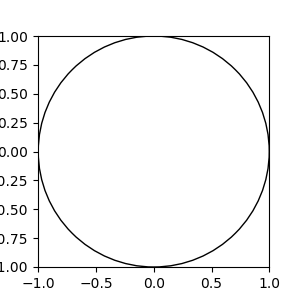

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as pch

fig, ax = plt.subplots(figsize=(3,3))
c = pch.Circle(xy=(0, 0), radius=1, fc='none', ec='k')
ax.add_patch(c)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_aspect('equal')
plt.show()

上図のように、一辺の長さが2の正方形と、その中にぴったり入る半径1の円を考えます。

この時、二つの図形の面積の比は次式のようになります。

$$\frac{円の面積}{正方形の面積} = \frac{\pi \times 1^2}{2 \times 2} = \frac{\pi}{4}$$

ここで、この正方形の中にランダムに点を打っていった場合、次のような関係が成り立つはずです。

$$\frac{円の中に入った点の数}{打った点の総数} \sim \frac{\pi}{4}$$

ここから逆に、点を打つ実験を行なって$\frac{円の中に入った点の数}{打った点の総数}$を求め、そこに4を掛ければ、円周率を見積もることができます。

$$\frac{円の中に入った点の数}{打った点の総数}　\times 4 \sim \pi$$

以下では、この内容を実際にPythonでシミュレーションして確かめてみます。

## ライブラリ準備

In [63]:
# 数値計算用のライブラリをインポート
import numpy as np

# 描画用のライブラリをインポート
import matplotlib.pyplot as plt
import matplotlib.patches as pch

## 試行回数を設定

In [91]:
num_trial = 10

In [92]:
num_trial

10

## x座標を生成

In [93]:
# 絶対値部分
x_abs = np.random.rand(num_trial)

In [94]:
x_abs

array([0.53652135, 0.24085485, 0.43766187, 0.29231566, 0.65168423,
       0.56875228, 0.22323234, 0.48993085, 0.34958442, 0.6790715 ])

In [95]:
# 符号部分
x_sign = np.random.choice([-1,1], num_trial)

In [97]:
x_sign

array([ 1,  1,  1,  1, -1,  1, -1, -1,  1, -1])

In [98]:
# 絶対値に符号をかけてx座標の値を作成
x_val = x_abs*x_sign

In [99]:
x_val

array([ 0.53652135,  0.24085485,  0.43766187,  0.29231566, -0.65168423,
        0.56875228, -0.22323234, -0.48993085,  0.34958442, -0.6790715 ])

## y座標を生成

In [100]:
# 絶対値部分
y_abs = np.random.rand(num_trial)

In [101]:
y_abs

array([0.1161874 , 0.83201982, 0.83672577, 0.50994699, 0.45054949,
       0.94059799, 0.67516469, 0.89601465, 0.59462727, 0.95291494])

In [102]:
# 符号部分
y_sign = np.random.choice([-1,1], num_trial)

In [103]:
y_sign

array([-1,  1, -1, -1, -1, -1,  1, -1, -1, -1])

In [104]:
# 絶対値に符号をかけてy座標の値を作成
y_val = y_abs*x_sign

In [105]:
y_val

array([ 0.1161874 ,  0.83201982,  0.83672577,  0.50994699, -0.45054949,
        0.94059799, -0.67516469, -0.89601465,  0.59462727, -0.95291494])

## 原点からの距離

![](https://upload.wikimedia.org/wikipedia/commons/9/97/InvPythagorean_theorem.jpg)

三平方の定理を使用して、各点の原点からの距離を求めます。

$$ c^2 = a^2 + b^2$$

$$ c = \sqrt{a^2 + b^2}$$

In [106]:
r = np.sqrt(x_val**2+y_val**2)

In [107]:
r

array([0.5489578 , 0.86618014, 0.9442764 , 0.5877877 , 0.79226712,
       1.09918322, 0.71111183, 1.02121227, 0.68977595, 1.17012179])

## 円の中に入ったかどうかの判定

In [108]:
r < 1

array([ True,  True,  True,  True,  True, False,  True, False,  True,
       False])

In [110]:
sum(r < 1)

7

In [111]:
num_in = sum(r<1)

In [112]:
num_in

7

## 円周率の推定値

In [113]:
# 円周率の推定値
pi = (num_in/num_trial)*4

In [114]:
pi

2.8

## 結果の描画

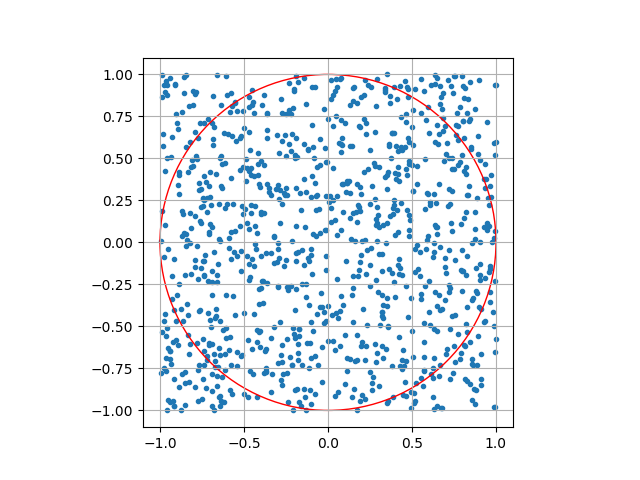

In [127]:
# 図を描くための準備（台紙figと付箋axを用意）
fig, ax = plt.subplots()

# 付箋にデータを散布図として描画
ax.scatter(x_val, y_val, marker='.')

# 円を作成
c = pch.Circle(xy=(0, 0), radius=1, fc='none', ec='r')

# 円を付箋に描画
ax.add_patch(c)

# 軸の縦横比を揃える
ax.set_aspect('equal')

# マス目を表示
ax.grid(True)

# 描画
plt.show()

試行回数: 1,000回
円周率の推定値:  3.108


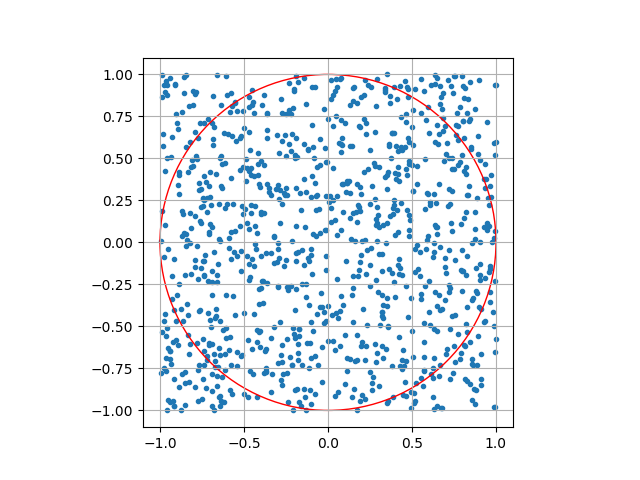

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch

num_trial = 1000

x_abs = np.random.rand(num_trial)
x_sign = np.random.choice([-1,1], num_trial)
x_val = x_abs*x_sign

y_abs = np.random.rand(num_trial)
y_sign = np.random.choice([-1,1], num_trial)
y_val = y_abs*y_sign

r = np.sqrt(x_val**2+y_val**2)
num_in = sum(r<1)
pi = (num_in/num_trial)*4

print(f'試行回数: {num_trial:,}回')
print('円周率の推定値: ', pi)

fig, ax = plt.subplots()
ax.scatter(x_val, y_val, marker='.')
c = pch.Circle(xy=(0, 0), radius=1, fc='none', ec='r')
ax.add_patch(c)
ax.set_aspect('equal')
ax.grid(True)
plt.show()

# 今後の学びに向けて

## Pythonの学習

はじめはウェブサイトやYouTubeで、自分にあったものを探して気軽に始めてみましょう。（その後、もっと興味が出てきたら、書店で自分に合った本を探して購入しましょう。）

- 無料オンライン学習サイトの例
  - [paiza](https://paiza.jp/works/)
  - [progate](https://prog-8.com/dashboard)

- 無料YouTube動画の例
  - [Pythonプログラミング VTuber サプー](https://www.youtube.com/@pythonvtuber9917)


In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://www.youtube.com/watch?v=WedaSgxk_18&list=PLiaZfx-34L5oK_8hLi_jbmFfZgZoGCqnr&index=5', width=600, height=400)

## Pythonを動かす環境

1. ウェブブラウザ上で実行
    - 先程紹介した
    - [Try Jupyter](https://jupyter.org/try-jupyter/lab/)（易）
    - [Google Colaboratory](https://colab.research.google.com/)（易）
        - アカウントを作成する必要
        - 永続的な利用が可能（時間制限あり）
    - [Amazon SageMaker Studio Lab](https://studiolab.sagemaker.aws/)（難）
        - より柔軟な環境構築が可能

2. ローカル実行環境を構築（難）

